<a href="https://colab.research.google.com/github/Wej28C/Introduction_Artificial_intelligence_CHPS704/blob/main/TP3/2-Devoir1-Regression_meteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prévision simple du temps

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des données


In [4]:
!wget https://raw.githubusercontent.com/lsteffenel/CHPS0704/refs/heads/main/data/weather.csv

--2024-10-22 19:18:03--  https://raw.githubusercontent.com/lsteffenel/CHPS0704/refs/heads/main/data/weather.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495176 (484K) [text/plain]
Saving to: ‘weather.csv’

weather.csv         100%[===================>] 483.57K  --.-KB/s    in 0.06s   

2024-10-22 19:18:03 (8.05 MB/s) - ‘weather.csv’ saved [495176/495176]



In [5]:
fichier_meteo = "weather.csv"

Afficher les colonnes

In [6]:
# charger les données
df = pd.read_csv(fichier_meteo)
#print(df.columns)
#format liste
print(df.columns.tolist())
#quick view sur les données
print(df.head())


['Temperature_c', 'Humidity', 'Wind_Speed_kmh', 'Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Rain', 'Description']
   Temperature_c  Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  \
0      -0.555556      0.92         11.2700                   130   
1      21.111111      0.73         20.9300                   330   
2      16.600000      0.97          5.9731                   193   
3       1.600000      0.82          3.2200                   300   
4       2.194444      0.60         10.8836                   116   

   Visibility_km  Pressure_millibars  Rain Description  
0         8.0500             1021.60     0        Cold  
1        16.1000             1017.00     1        Warm  
2        14.9086             1013.99     1      Normal  
3        16.1000             1031.59     1        Cold  
4         9.9820             1020.88     1        Cold  


# Description des données

In [7]:
# A completer

# quels types de données
# y a-t-il des données manquantes ?

# resume sur les données du data frame
print(df.info())

#descriptif du data frame
print(df.describe())

#affichage des données manquantes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB
None
       Temperature_c      Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  \
count   10000.000000  10000.000000    10000.000000          10000.000000   
mean       11.857208      0.735272       10.813565            185.979700   
std         9.512244      0.195498        6.972569            107.469909   
min       

## Séparer les données en training et test

In [8]:
# a compléter.
# Vous pouvez utiliser la fonction train_test_split() de sklearn.model_selection
# utiliser un test_size de 33%
from sklearn.model_selection import train_test_split
# Séparation du DataFrame entier avec 33% pour le test
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)


Afficher le shape (dimensions) des ensembles train et test

In [9]:
# Afficher les dimensions (shape) des ensembles d'entraînement et de test
print("Shape de l'ensemble d'entraînement (train_df):", train_df.shape)
print("Shape de l'ensemble de test (test_df):", test_df.shape)
# Afficher les données d'entraînement et de test
print("\nEnsemble d'entraînement (train_df):\n", train_df)
print("\nEnsemble de test (test_df):\n", test_df)

Shape de l'ensemble d'entraînement (train_df): (6700, 8)
Shape de l'ensemble de test (test_df): (3300, 8)

Ensemble d'entraînement (train_df):
       Temperature_c  Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  \
8371      11.044444      0.67         15.1984                   149   
5027      23.961111      0.47          8.3076                   142   
9234      -1.250000      0.92         10.9641                   202   
3944      12.222222      0.47         20.3021                   271   
6862      -1.227778      1.00          7.8890                   102   
...             ...       ...             ...                   ...   
5734       8.888889      0.77          9.6600                    20   
5191       7.194444      0.65         23.7153                   320   
5390       1.088889      0.92         12.5419                    21   
860       31.344444      0.34          9.6761                   174   
7270      12.105556      0.93          4.2182                    57   

   

Séparer maintenant les features (humidité) et le target (température).

Créer un DataFrame x_train avec la colonne « Humidity » (feature) et un y_train avec la colonne « Temperature_c » (target)

Faire la même chose pour les données de test (x_test et y_test)

In [10]:
x= df[['Humidity']]
y= df['Temperature_c']

# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print("x_train (features - Humidity):\n", x_train)
print("\ny_train (target - Temperature_c):\n", y_train)
print("\nx_test (features - Humidity):\n", x_test)
print("\ny_test (target - Temperature_c):\n", y_test)

x_train (features - Humidity):
       Humidity
8371      0.67
5027      0.47
9234      0.92
3944      0.47
6862      1.00
...        ...
5734      0.77
5191      0.65
5390      0.92
860       0.34
7270      0.93

[6700 rows x 1 columns]

y_train (target - Temperature_c):
 8371    11.044444
5027    23.961111
9234    -1.250000
3944    12.222222
6862    -1.227778
          ...    
5734     8.888889
5191     7.194444
5390     1.088889
860     31.344444
7270    12.105556
Name: Temperature_c, Length: 6700, dtype: float64

x_test (features - Humidity):
       Humidity
6252      0.51
4684      0.86
1731      0.88
4742      0.64
4521      0.96
...        ...
1744      0.40
9754      0.61
6094      0.90
8781      0.33
9401      0.81

[3300 rows x 1 columns]

y_test (target - Temperature_c):
 6252    -2.727778
4684    11.094444
1731     1.122222
4742    -2.850000
4521     7.777778
          ...    
1744    27.777778
9754     7.150000
6094    16.144444
8781    22.222222
9401    15.511111
Name: Tem

Utiliser un LinearRegression() pour estimer la température à partir de l'humidité

In [13]:
from sklearn.linear_model import LinearRegression

# Création d'une instance du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(x_train, y_train)

LinearRegression()

In [14]:
#afficher les coefficients obtenus

intercept = model.intercept_
coeffs = model.coef_

print ('intercept :', intercept, 'Coeff humidité :', coeffs)

print('Temperature = ', intercept, '+' , coeffs[0], 'x Humidity')


intercept : 34.57484017439725 Coeff humidité : [-30.88864271]
Temperature =  34.57484017439725 + -30.888642713374534 x Humidity


Une fois entrainé, on peut tester le modèle avec les données de test (x_test)

In [15]:
y_pred = model.predict ( x_test )

In [17]:
## Créer un dataframe pour la visualisation des résultats
import pandas as pnd

visu = pnd.DataFrame(y_test)
visu['Predicted'] = y_pred
visu['Humidity'] = x_test['Humidity'].values

visu.rename(columns={'Temperature_c':'Expected'}, inplace=True)

visu.head()


,Expected,Predicted,Humidity
6252,-2.727778,18.821632,0.51
4684,11.094444,8.010607,0.86
1731,1.122222,7.392835,0.88
4742,-2.850000,14.806109,0.64
4521,7.777778,4.921743,0.96


## Analyse du modèle

Grâce au code suivant, que pensez-vous des résultats par rapport aux métriques obtenues ?

<Axes: title={'center': 'Predicted'}, xlabel='Humidity'>

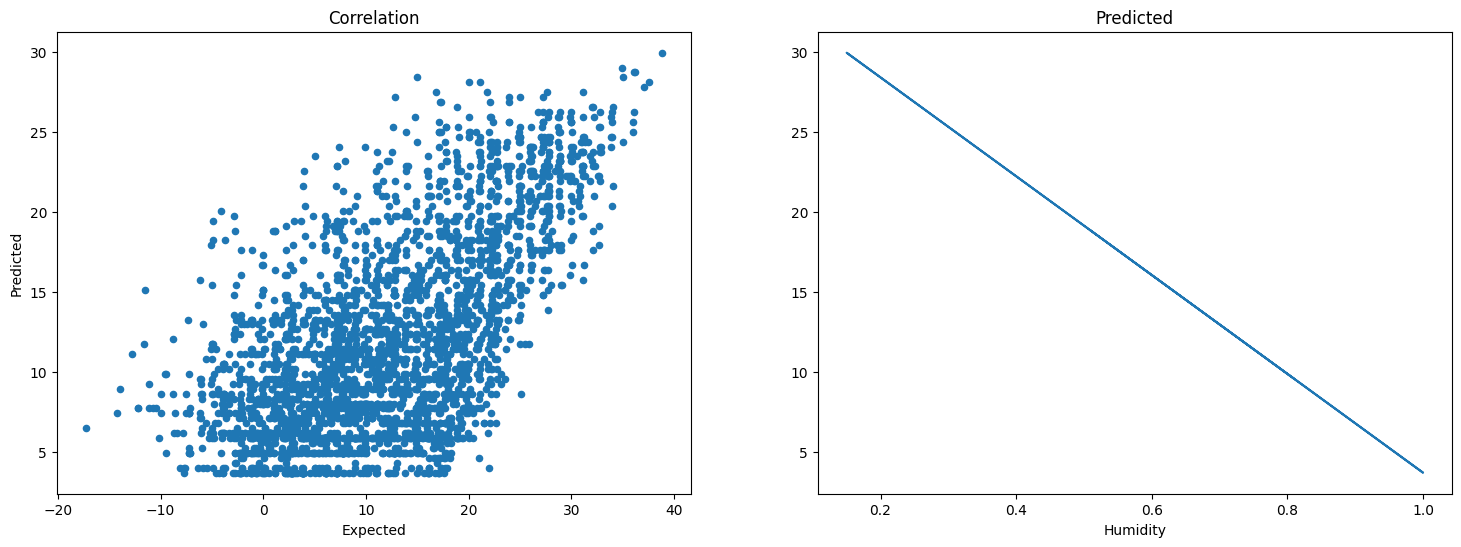

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

visu.plot.scatter ( x='Expected', y='Predicted', title='Correlation', ax=axs[0] )

visu.set_index('Humidity')['Predicted'].plot ( title='Predicted', kind='line', ax=axs[1] )


-> corrélation des points :les points ne sont pas très proches de la diagonale (y=x) donc les prédictions ne sont pas très précises.
<br>-> L'évolution des températures prédites avec l'humidité est décroissante cela veut dire que la température diminue avec l'augmentation de l'humidité.


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from math import sqrt
#moyenne des différences
mae = mean_absolute_error ( y_test , y_pred )

mse = mean_squared_error ( y_test , y_pred )
rmse = sqrt(mse)


r2 = r2_score ( y_test , y_pred )


expvar = explained_variance_score ( y_test , y_pred )

print ('MAE={:.3f}'.format(mae) )
print ('RMSE={0:.3f} \t MSE={1:.3f} '.format(rmse, mse) )
print ('R2={:.3f}'.format(r2) )
print ('Explained Variance={:.3f}'.format(expvar))


MAE=6.006
RMSE=7.319 	 MSE=53.564 
R2=0.385
Explained Variance=0.385


## Pourquoi la métrique "explained variance" est si bas ???
Est-ce qu'on peut faire mieux ?

* Explained variance est basse cela signifie qu'il ya un sous apprentissage (underfitting)
* Nous devons dans ce cas choisir un modèle qui se généralise  aux futures données à prédire

# Modèle de Régression Linéaire Multiple

Utiliser plusieurs variables (features) peut aider à améliorer la qualité du modèle !

Problème : la colonne "Description" n'est pas numérique.

Utiliser un "One-hot-encoder" pour transformer Description.

In [23]:
from sklearn.preprocessing import OneHotEncoder
features = df[['Humidity', 'Description','Rain','Wind_Speed_kmh']]  # Inclut la colonne catégorielle "Description"
target = df['Temperature_c']
#encodeur de description
onehot_encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False pour obtenir un DataFrame dense
encoded_features = onehot_encoder.fit_transform(features[['Description']])
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(['Description']))
# Concaténer les colonnes encodées avec les autres features
features_encoded = pd.concat([features.drop(columns=['Description']), encoded_df], axis=1)


Refaire la séparation training et test utiliser maintenant toutes les variables.


In [24]:
x_train, x_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.33, random_state=42)
# Affichage des dimensions de données
print("Dimensions de x_train :", x_train.shape)
print("Dimensions de x_test :", x_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de x_train : (6700, 6)
Dimensions de x_test : (3300, 6)
Dimensions de y_train : (6700,)
Dimensions de y_test : (3300,)


Entraîner le nouveau model et afficher les métriques obtenues.


In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

# Prédictions
y_pred = model.predict(x_test)

intercept = model.intercept_
coeffs = model.coef_

# Afficher les résultats
print('Intercept :', intercept)
print('Coefficients des variables :')

# Afficher les coefficients pour chaque feature
for feature_name, coef in zip(features_encoded.columns, coeffs):
    print(f'{feature_name} : {coef}')

print('Temperature = ', intercept, '+' , coeffs[0], 'x Humidity')


Intercept : 13.819866044102403
Coefficients des variables :
Humidity : -8.438203498596948
Rain : 5.786238350484137
Wind_Speed_kmh : -0.06933866010580303
Description_Cold : -9.295693211664174
Description_Normal : -0.6974936157070534
Description_Warm : 9.993186827371247
Temperature =  13.819866044102403 + -8.438203498596948 x Humidity


In [27]:
mae = mean_absolute_error ( y_test , y_pred )

mse = mean_squared_error ( y_test , y_pred )
rmse = sqrt(mse)


r2 = r2_score ( y_test , y_pred )


expvar = explained_variance_score ( y_test , y_pred )

print ('MAE={:.3f}'.format(mae) )
print ('RMSE={0:.3f} \t MSE={1:.3f} '.format(rmse, mse) )
print ('R2={:.3f}'.format(r2) )
print ('Explained Variance={:.3f}'.format(expvar))

MAE=2.851
RMSE=3.502 	 MSE=12.262 
R2=0.859
Explained Variance=0.859


=> Nous avons une meilleur explained variance en utilisant le modèle de régression linéaire multiple

# Challenge

On n'a pas vraiment étudié les modèles plus avancés (ARIMA, etc.) mais, si vous vous sentez en forme, essayez d'appliquer l'une de ces méthodes à cette prévision du temps.